In [ ]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 31.8 MB/s 
     |████████████████████████████████| 1.8 MB 56.4 MB/s 
     |████████████████████████████████| 9.9 MB 53.1 MB/s 
     |████████████████████████████████| 569 kB 64.2 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 798 kB 68.7 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 11.2 MB 58.8 MB/s 
     |████████████████████████████████| 85 kB 4.6 MB/s 
     |████████████████████████████████| 1.6 MB 53.1 MB/s 
     |████████████████████████████████| 965 kB 61.8 MB/s 
     |████████████████████████████████| 529 kB 66.0 MB/s 
     |████████████████████████████████| 87 kB 8.1 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115940 sha256=c72d17c8fa52431c64d6fe9d2127e457431f3902f8fa5ec2c08e06043a074129
 

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

In [ ]:
import pandas as pd

df = pd.read_csv('./convertcsv.csv')
print(df)

           SKU   S1    S2    S3   S4
0   04-01-2015  100     0   600  910
1   05-01-2015  300  1510  1520  619
2   06-01-2015  719  2520   355  860
3   07-01-2015  320  1899  1045  700
4   08-01-2015  259   999   430  350
..         ...  ...   ...   ...  ...
82  02-01-2022  180  1200   270  320
83  03-01-2022  480   809   470  205
84  04-01-2022  280  1529   505  494
85  05-01-2022    0   920   195  335
86  06-01-2022  120   515   335  420

[87 rows x 5 columns]


In [ ]:
import pandas as pd

In [ ]:
data_new = df[["SKU","S4"]]

In [ ]:
data_new

,SKU,S4
0,04-01-2015,910
1,05-01-2015,619
2,06-01-2015,860
3,07-01-2015,700
4,08-01-2015,350
...,...,...
82,02-01-2022,320
83,03-01-2022,205
84,04-01-2022,494
85,05-01-2022,335


In [ ]:
pd.Timestamp('19580101')

Timestamp('1958-01-01 00:00:00')

In [ ]:
87 * .7

60.9

In [ ]:
data_new.iloc[59]

SKU    03-01-2020
S4             80
Name: 59, dtype: object

In [ ]:
pd.Timestamp('20200201')

Timestamp('2020-02-01 00:00:00')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SKU     87 non-null     object
 1   S1      87 non-null     int64 
 2   S2      87 non-null     int64 
 3   S3      87 non-null     int64 
 4   S4      87 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.5+ KB


In [ ]:
from datetime import datetime

datetime_str = '09-19-18'

datetime_object = datetime.strptime(datetime_str, '%m-%d-%y')

print(type(datetime_object))
print(datetime_object)  # printed in default format

<class 'datetime.datetime'>
2018-09-19 00:00:00


In [ ]:
data_new['SKU'] = pd.to_datetime(data_new['SKU'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_new

,SKU,S4
0,2015-04-01,910
1,2015-05-01,619
2,2015-06-01,860
3,2015-07-01,700
4,2015-08-01,350
...,...,...
82,2022-02-01,320
83,2022-03-01,205
84,2022-04-01,494
85,2022-05-01,335


In [ ]:
from darts import TimeSeries

Series = TimeSeries.from_dataframe(data_new,'SKU','S4')

In [ ]:
train, val = Series.split_before(pd.Timestamp('20200301'))

# EXPONENTIAL SMOOTHNING

In [ ]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

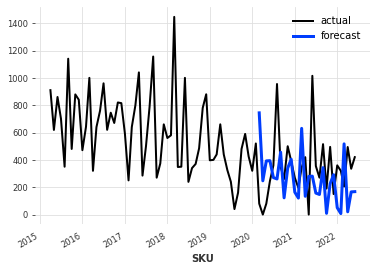

In [ ]:
import matplotlib.pyplot as plt

Series.plot(label = 'actual')
prediction.plot(label = 'forecast', lw = 3)
plt.legend()

# AUTO ARIMA

In [ ]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

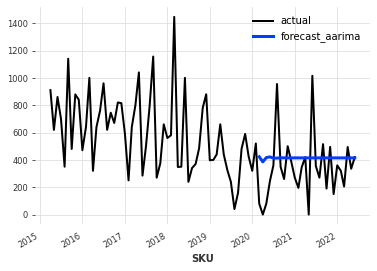

In [ ]:
Series.plot(label = 'actual')
prediction_aarima.plot(label = 'forecast_aarima', lw = 3)
plt.legend()

# Fast Fourier Transform(FFT)

In [ ]:
from darts.models import FFT

model_fft = FFT()
model_fft.fit(train)
prediction_fft = model_fft.predict(len(val))

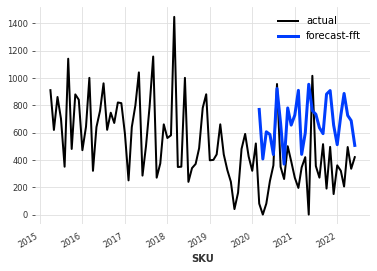

In [ ]:
Series.plot(label = 'actual')
prediction_fft.plot(label = 'forecast-fft', lw = 3)
plt.legend()

# Facebook Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_c4fbs8/9vk2i2q_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_c4fbs8/bjl74a8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70627', 'data', 'file=/tmp/tmpq_c4fbs8/9vk2i2q_.json', 'init=/tmp/tmpq_c4fbs8/bjl74a8f.json', 'output', 'file=/tmp/tmpq_c4fbs8/prophet_modelxs94e89w/prophet_model-20221116092407.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:24:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:24:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


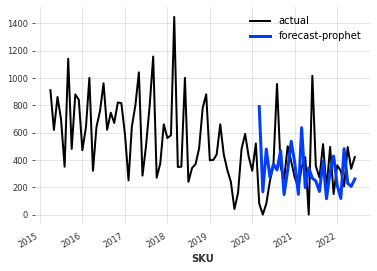

In [ ]:
from darts.models import Prophet

model_prophet = Prophet()
model_prophet.fit(train)
prediction_prophet = model_prophet.predict(len(val))


Series.plot(label = 'actual')
prediction_prophet.plot(label = 'forecast-prophet', lw = 3)
plt.legend()

# N BEATS

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/setup.py:178: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable par

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


Predicting: 1it [00:00, ?it/s]

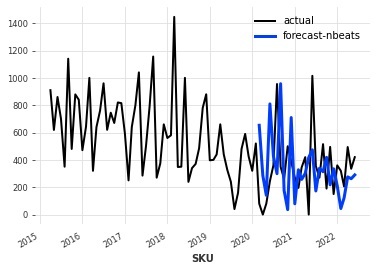

In [ ]:
from darts.models import NBEATSModel

model_nbeats = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)
model_nbeats.fit(train)
prediction_nbeats = model_nbeats.predict(len(val))


Series.plot(label = 'actual')
prediction_nbeats.plot(label = 'forecast-nbeats', lw = 3)
plt.legend()